# Tim hiểu open cv


## Chung

OpenCv là thư viện mã nguồn mở cho thị giác máy tính, học máy và xử lí ảnh
Một số tính năng của OpenCV :

- Đầu vào/đầu ra ảnh/video, xử lý, hiển thị (core, imgproc, highgui):

> core: Cung cấp các hàm cơ bản cho xử lý ma trận, các phép toán số học và các chức năng hỗ trợ cơ bản.
> imgproc: Bao gồm các hàm xử lý hình ảnh như làm mờ, lọc, biến đổi màu sắc và phép biến đổi hình học.
> highgui: Cung cấp các công cụ để nhập và xuất hình ảnh và video, cũng như hiển thị các cửa sổ đồ họa.

- Nhận diện đối tượng/đặc trưng (objdetect, features2d, nonfree):

> objdetect: Bao gồm các thuật toán nhận diện đối tượng, như Cascade Classifier.
> features2d: Cung cấp các thuật toán trích xuất và so khớp đặc trưng (keypoints) trên hình ảnh.
> nonfree: Chưa các thuật toán không thuộc miễn phí màu trắng (non-free), ví dụ như SIFT và SURF.

- Thị giác máy tính dựa trên hình học một mắt hoặc stereo (calib3d, stitching, videostab):

> calib3d: Cung cấp các công cụ cho việc hiệu chỉnh camera, tính toán ma trận chiếu và so khớp hình ảnh stereo.
> stitching: Cho phép ghép nối nhiều ảnh thành ảnh panorama hoặc ảnh panorama 360 độ.
> videostab: Dành cho ổn định hình ảnh trong video để giảm rung và dao động.

- Tính toán trên ảnh (photo, video, superres):

> photo: Cung cấp các công cụ xử lý ảnh như làm mờ, làm nổi bật, cân bằng màu sắc và các hiệu ứng hình ảnh khác.
> video: Bao gồm các công cụ cho xử lý video như theo dõi đối tượng, phân loại và định dạng hình ảnh chuyển động.
> superres: Dùng để tăng cường độ phân giải của hình ảnh hoặc video.

- Học máy & phân nhóm (ml, flann):

> ml: Bao gồm các công cụ học máy để huấn luyện và dự đoán dữ liệu.
> flann: Cung cấp một thư viện hiệu quả cho việc tìm kiếm và so khớp nhanh chóng trong không gian vector.

- Tăng tốc CUDA (gpu):

> gpu: Cho phép sử dụng tính toán song song trên GPU để tăng tốc độ xử lý đặc biệt là trong lĩnh vực thị giác máy tính.


## Basic operation on image


In [27]:

%matplotlib inline
import cv2
from matplotlib import pyplot
import numpy


In [28]:
#reading image

image = cv2.imread("images/img.png")



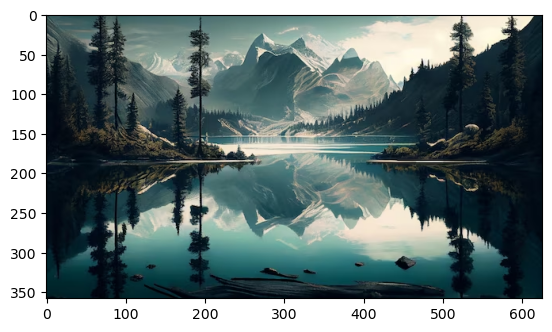

In [29]:
#show image
pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
pyplot.show()

In [30]:
#functiono to show image
def show_image(current_image):
    pyplot.imshow(cv2.cvtColor(current_image, cv2.COLOR_BGR2RGB))
    pyplot.show()

In [31]:
# extract size of image
print(image.shape)
print(image.shape[:2]) # height, width


(358, 626, 3)
(358, 626)


In [32]:
#get RGB value of pixel
[B,G,R] = image[0,0]
print(f"R: {R}, G: {G}, B: {B}")

R: 57, G: 81, B: 83


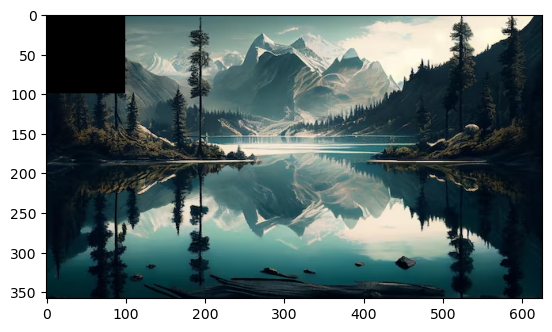

In [33]:
# change pixel value
image2 = image.copy()
for i in range(100):
    for j in range(100):
        image2[i,j] = [0,0,0]

pyplot.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
pyplot.show()


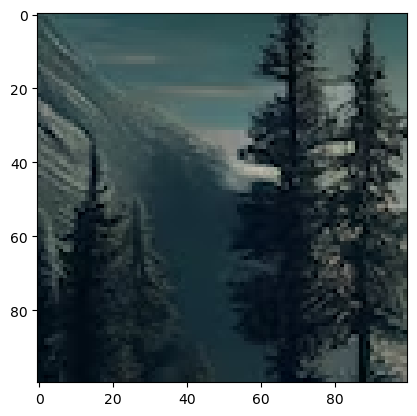

In [34]:
# crop image
crop_image = image[0:100,0:100]
pyplot.imshow(cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB))
pyplot.show()


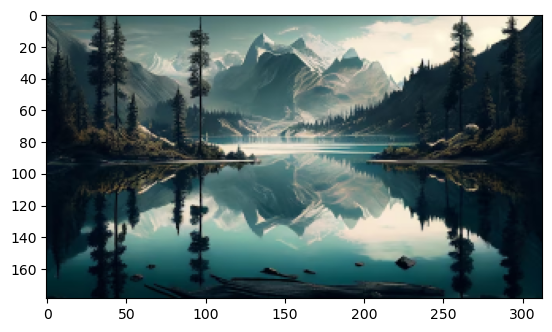

In [35]:
# resize image
# resized_image =cv2.resize(image, (200,200))
resized_image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
pyplot.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
pyplot.show()

(179.0, 313.0)
(358, 626)


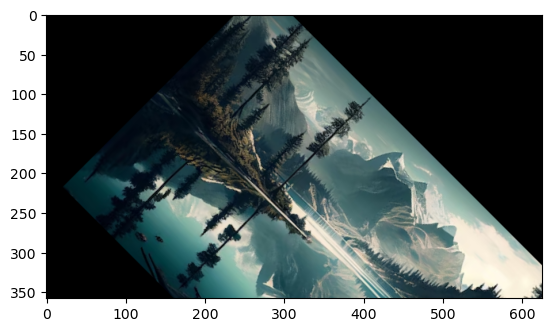

In [36]:
# rotate image
center_point  =tuple(i/2 for i in image.shape[:2])
print(center_point)
print(image.shape[:2])

rotated_image = cv2.warpAffine(image, cv2.getRotationMatrix2D(center_point, -45, 1),(image.shape[1], image.shape[0]))

pyplot.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))


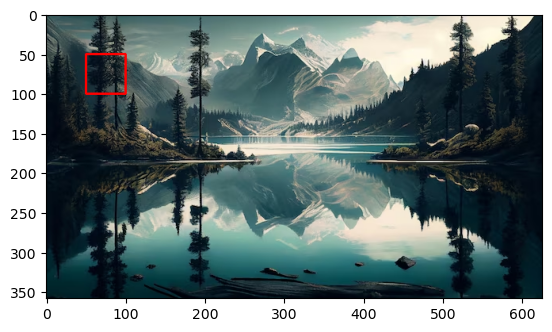

In [37]:
#draw rectangle
image = cv2.imread("images/img.png")
rec = cv2.rectangle(image, (50,50),(100,100),(0,0,255),2)
show_image(rec)


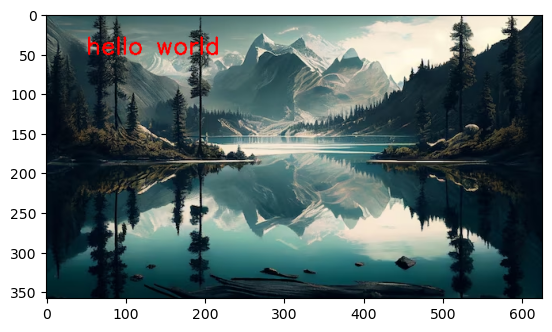

In [38]:
#display text
image = cv2.imread("images/img.png")
text = cv2.putText(image , "hello world", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
show_image(text)

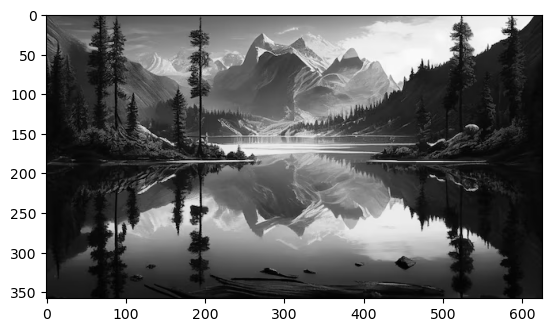

In [39]:
# gray image
image = cv2.imread("images/img.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image)

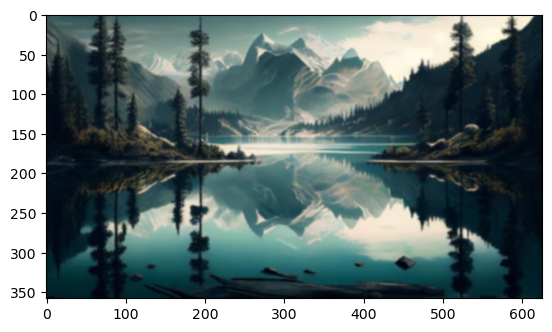

In [40]:
# blur image
image = cv2.imread("images/img.png")
blurred_image = cv2.GaussianBlur(image, (5,5), 0)
show_image(blurred_image)


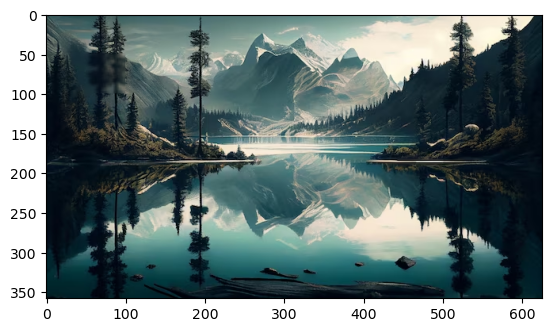

In [41]:
# blur part of image
image = cv2.imread("images/img.png")
image[50:100,50:100] = cv2.GaussianBlur(image[50:100,50:100], (5,5), 1000)
show_image(image)


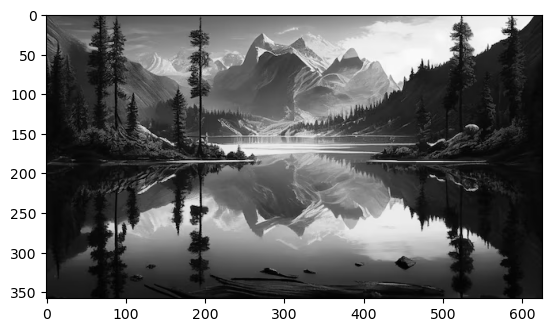

True

In [42]:
#save image
show_image(gray_image)
cv2.imwrite("images/gray_image.png", gray_image)

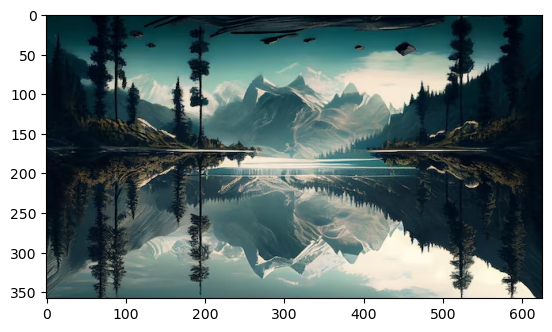

In [43]:
#flip image
image = cv2.imread("images/img.png")
flipped_image = cv2.flip(image, 0)
show_image(flipped_image)

In [44]:
#hsv color
image = cv2.imread("images/img.png")
hsv_image  = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


## Arithmetic Operations on Images


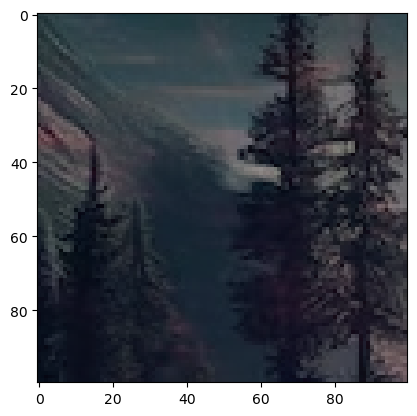

In [45]:
#add two images, same size
img1 = cv2.imread("images/img.png")[0:100,0:100]
img2 = cv2.imread("images/img_1.png")[0:100,0:100]
img3 = cv2.addWeighted(img1,0.7,img2,0.3,0)
show_image(img3)


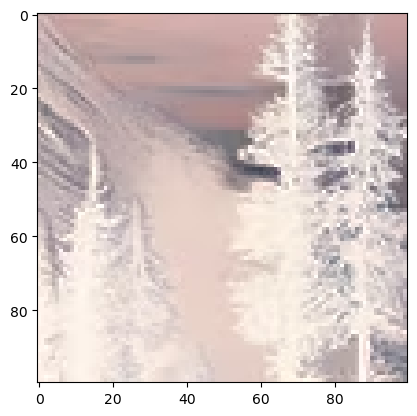

In [46]:
# bitwise operation
img1 = cv2.imread("images/img.png")[0:100,0:100]
img2 = cv2.imread("images/img_1.png")[0:100,0:100]
img3 = cv2.bitwise_not(img1)
show_image(img3)


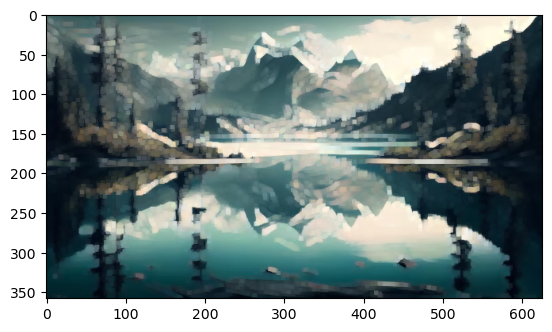

In [47]:
#image erosion & dilation
img = cv2.imread("images/img.png")
kernel = numpy.ones((5,5), numpy.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)

show_image(dilation)


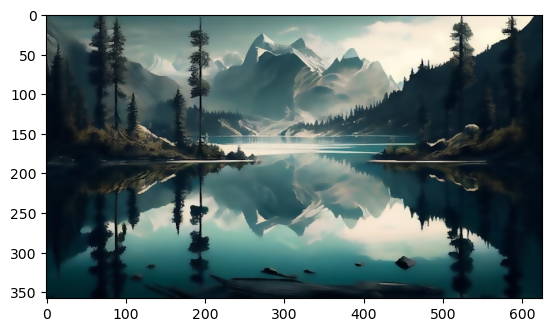

In [48]:
#blur
img = cv2.imread("images/img.png")
# blur = cv2.blur(img, (5,5))
# blur = cv2.GaussianBlur(img, (5,5), 0)
blur = cv2.medianBlur(img, 5)
blur = cv2.bilateralFilter(img, 9, 75, 75)
show_image(blur)

## Performance Measurement and Improvement Techniques


In [49]:
#time measurement
%timeit cv2.imread("images/img.png")



2.41 ms ± 18.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
#gpu cuda
import cv2.cuda as cuda
img = cv2.imread("images/img.png")
# Create a GPU mat
gpu_image = cuda.GpuMat()
gpu_image.upload(img)

gpu_image_gray  = cuda.cvtColor(gpu_image, cv2.COLOR_BGR2GRAY)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\include\opencv2/core/private.cuda.hpp:106: error: (-216:No CUDA support) The library is compiled without CUDA support in function 'throw_no_cuda'


## mathematics tool in opencv


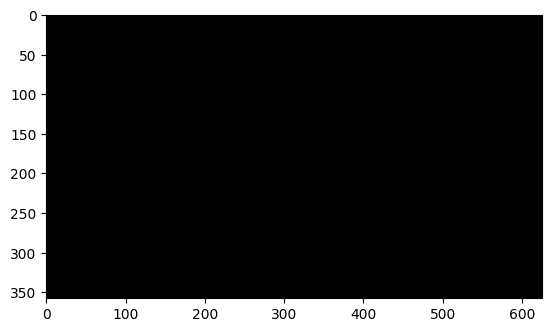

In [ ]:
#  Essentially image is numpy array. So , math operations can be performed on image same as on numpy array

#some basic math operations with image

image = cv2.imread("images/img.png")
image   = image//2
image = image + image
image -= image
image *= 2
show_image(image)

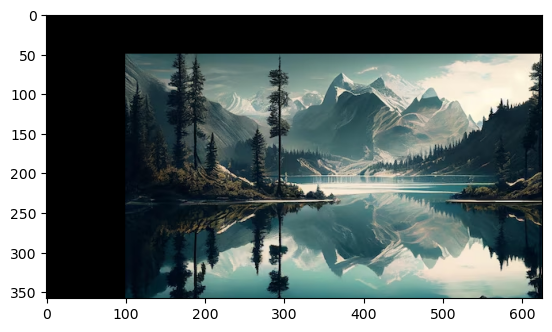

In [60]:
#shift image
img = cv2.imread("images/img.png")
(height, width) = img.shape[:2]

mat = numpy.float32([[1,0,100],[0,1,50]])
img = cv2.warpAffine(img,mat,(width,height))

#explanation
# 2 first column is for rotate & scale
# 3 column is for shift image

show_image(img)

In [88]:
# opencv matrix

img = cv2.imread("images/img.png")
arr = numpy.double([[1,2],[3,3]])
mat = cv2.Mat(arr)
#calculate matrix inversion:
_,inverted_mat  =cv2.invert(mat)

print(inverted_mat)
print(mat)
identity_matrix = mat@inverted_mat
print(identity_matrix)


[[-1.          0.66666667]
 [ 1.         -0.33333333]]
[[1. 2.]
 [3. 3.]]
[[1. 0.]
 [0. 1.]]


In [103]:
#probability & statistic
import numpy as np

# Generate 1000 samples from a normal distribution with mean 0 and standard deviation 1
samples = np.random.normal(loc=2.0, scale=10.0, size=1000)
# print(samples)

print(np.mean(samples))
print(np.median(samples))
print(np.std(samples))



1.8019323799424716
1.6267168834422534
9.818793433827818


In [111]:
# covariance matrix
samples = np.random.normal(loc=2.0, scale=10.0, size=(5,1))


# Calculate the covariance matrix
cov_matrix = np.cov(arr, rowvar=False)

print(cov_matrix)
# it has to be close to identity matrix



[[ 1.01363307 -0.06557931 -0.2560435  -0.42503678 -0.20079446]
 [-0.06557931  0.69528732  0.86208781  0.21042085 -0.51761797]
 [-0.2560435   0.86208781  1.51026962  0.39079703  0.12750257]
 [-0.42503678  0.21042085  0.39079703  1.46415068  0.09976718]
 [-0.20079446 -0.51761797  0.12750257  0.09976718  1.73154207]]


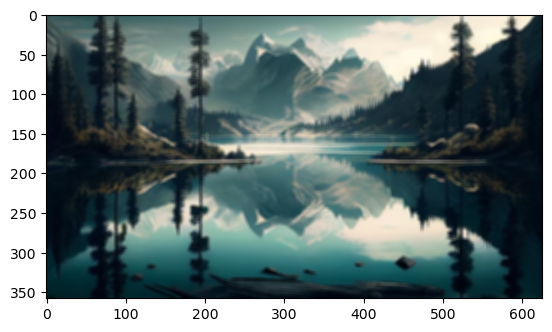

In [115]:
# convolution with opencv
img = cv2.imread("images/img.png")
kernel = np.ones((5,5),np.float32)/25
img = cv2.filter2D(img,-1,kernel)

# convolution with this kind of image is same as average blurring with size 5*5

show_image(img)

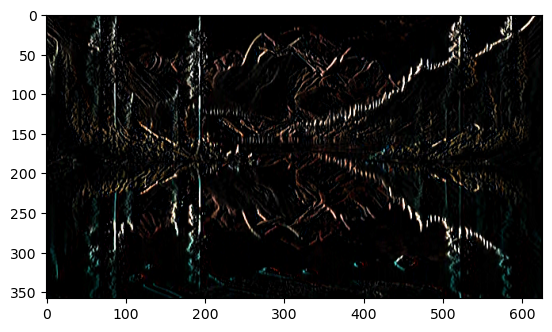

In [116]:
# convolution to extract vertical line
img = cv2.imread("images/img.png")

kernel = np.double([[1,0,-1],[1,0,-1],[1,0,-1]])

img = cv2.filter2D(img,-1,kernel)

show_image(img)

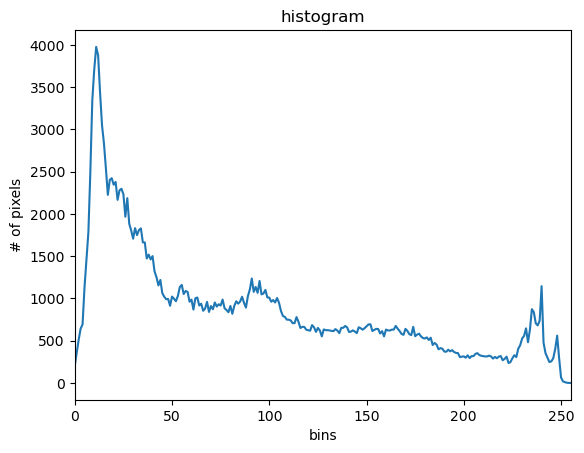

In [124]:
# histogram
image = cv2.imread("images/img.png", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([image],[0],None,[256],[0,256])
# print(hist)

pyplot.figure()
pyplot.title("histogram")
pyplot.ylabel("# of pixels")
pyplot.xlabel("bins")
pyplot.xlim([0,255])
pyplot.plot(hist)
pyplot.show()